<a href="https://colab.research.google.com/github/marceloherzog/Ansible/blob/master/Desafio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio do TITANIC - MBCA20

In [ ]:
import pandas as pd
import pandas.testing as tm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#monta o drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/test.csv')





In [ ]:
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Como não temos a coluna sobreviventes e o trabalho consiste em informar a chance de sobrevivência do Professor a planilha test.csv será descartada.
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
round(df1.isnull().mean()*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
#Iremos excluir a coluna Cabin já que a mesma contém muitos valores não preenchidos
del df1['Cabin']
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Verificando os dados
print ('Quantidade Total {}'.format(df1.shape[0]))
print ('Quantidade com Linhas Preenchidas {}'.format(df1.dropna().shape[0]))


Quantidade Total 891
Quantidade com Linhas Preenchidas 712


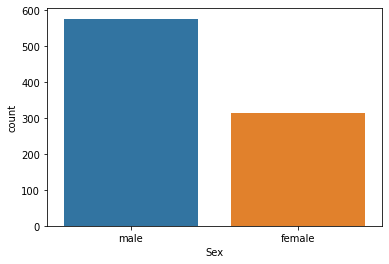

In [ ]:
sns.countplot(x='Sex',data=df1)
#Podemos verificar que o percentual de homens embarcados era maior que o de mulheres

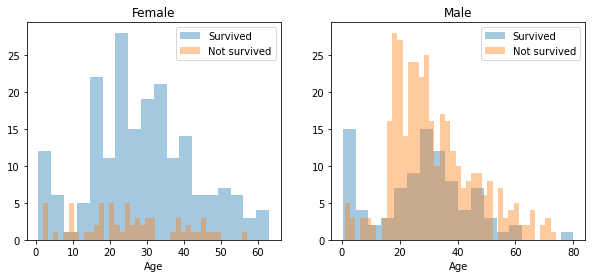

In [ ]:
Survived = 'Survived'
Not_survived = 'Not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = df1[df1['Sex']=='female']
male = df1[df1['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = Survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = Not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = Survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = Not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#Podemos verificar que houve muito mais sobreviventes Mulheres do que Homens
#Podemos verificar também que independente do sexo a faixa de idade entre 20 e 40 houve mais sobreviventes


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



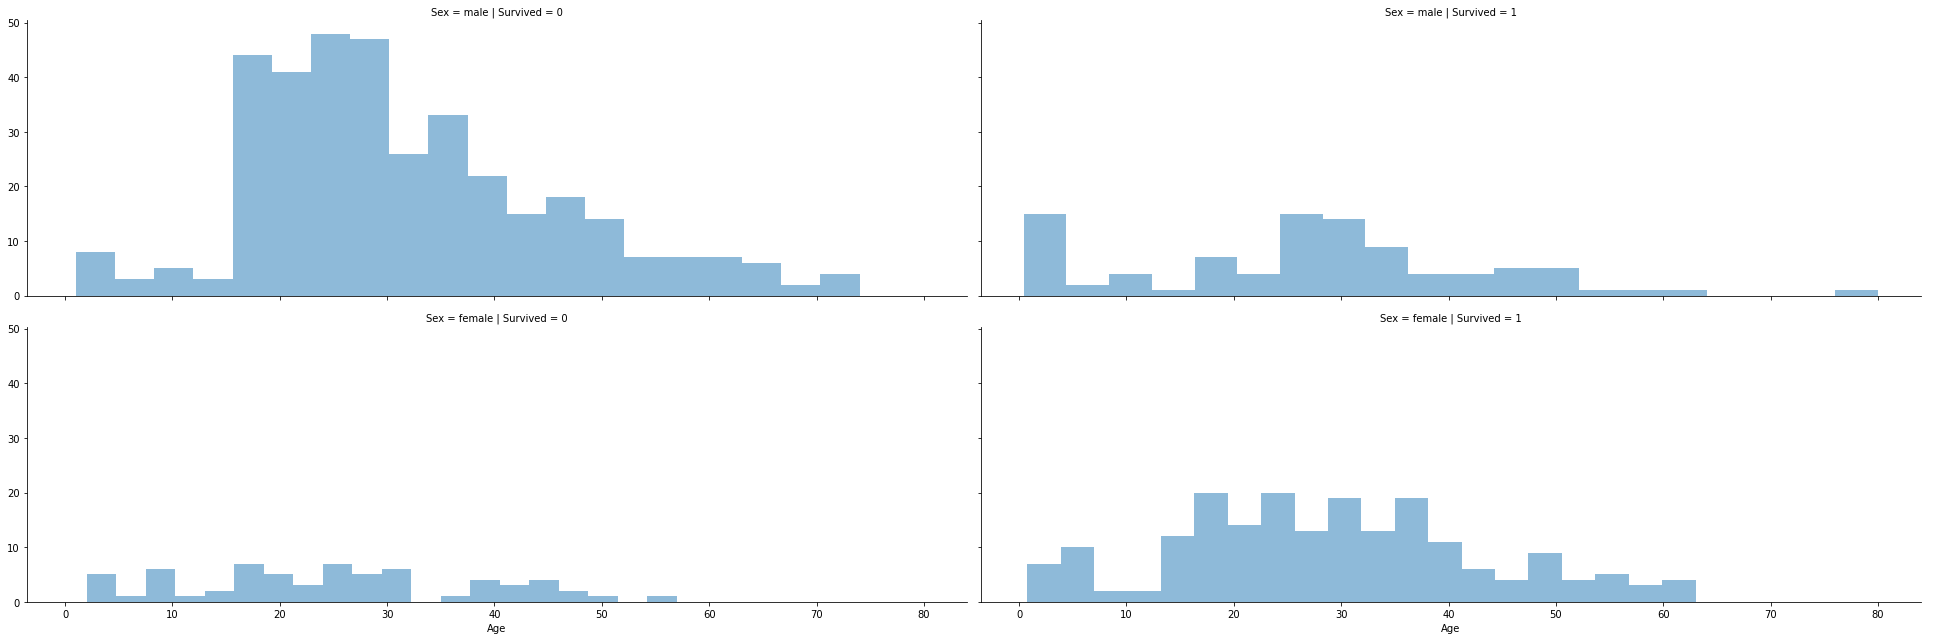

In [ ]:
grid = sns.FacetGrid(df1, col='Survived', row='Sex', size=4.5, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#Duas formas de verificar

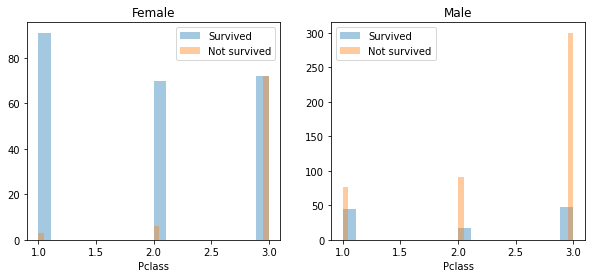

In [ ]:
Survived = 'Survived'
Not_survived = 'Not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = df1[df1['Sex']=='female']
male = df1[df1['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Pclass.dropna(), bins=18, label = Survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Pclass.dropna(), bins=40, label = Not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1].Pclass.dropna(), bins=18, label = Survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Pclass.dropna(), bins=40, label = Not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#Aqui já podemos vericar a sobrevivência do homem e mulher em comparação com sua classe

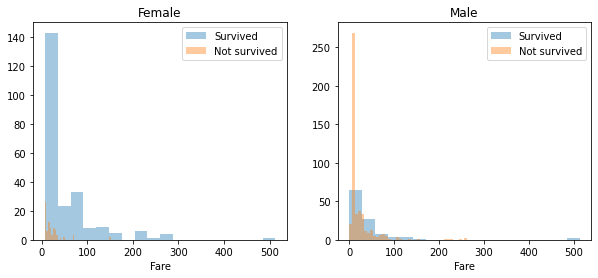

In [ ]:
Survived = 'Survived'
Not_survived = 'Not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = df1[df1['Sex']=='female']
male = df1[df1['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Fare.dropna(), bins=18, label = Survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Fare.dropna(), bins=40, label = Not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1].Fare.dropna(), bins=18, label = Survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Fare.dropna(), bins=40, label = Not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#Aqui já podemos vericar que se fosse mulher e tivesse pago mais de 100, praticamente todas sobreviveram
#Já os homens apenas o que pagou 500 teve certeza de sobrevivência


<Figure size 864x504 with 0 Axes>

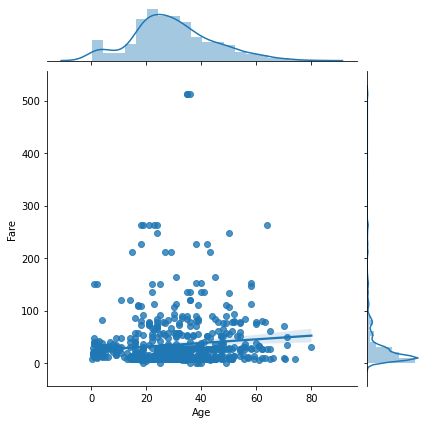

In [ ]:
plt.figure(figsize=(12,7))
sns.jointplot(x='Age',y='Fare',data=df1,kind='reg')

#Aqui podemos ver que a maioria pagou póximo do mesmo valor

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


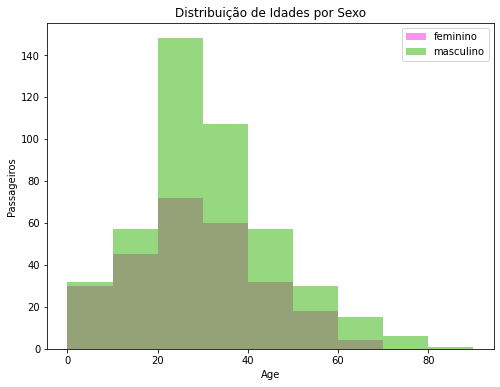

In [ ]:

"""
Criando um histograma comparando as idades masculino x feminino
"""

fem = df1[df1['Sex'] == 'female']
mas = df1[df1['Sex'] == 'male']

idade_fem = fem['Age']
idade_mas = mas['Age']

plt.figure(figsize=(8, 6))

plt.title('Distribuição de Idades por Sexo')

plt.xlabel('Age')
plt.ylabel('Passageiros')

plt.hist(idade_fem, bins=range(0, 100,10),
         alpha=0.5, label='feminino', color='#FF26E1')
plt.hist(idade_mas, bins=range(0, 100,10),
         alpha=0.5, label='masculino', color='#2DB200')
plt.legend(loc='upper right')


plt.show()

#Aqui podemos verificar que a maior parte dos passageiros tinham entre 20 e 40 anos

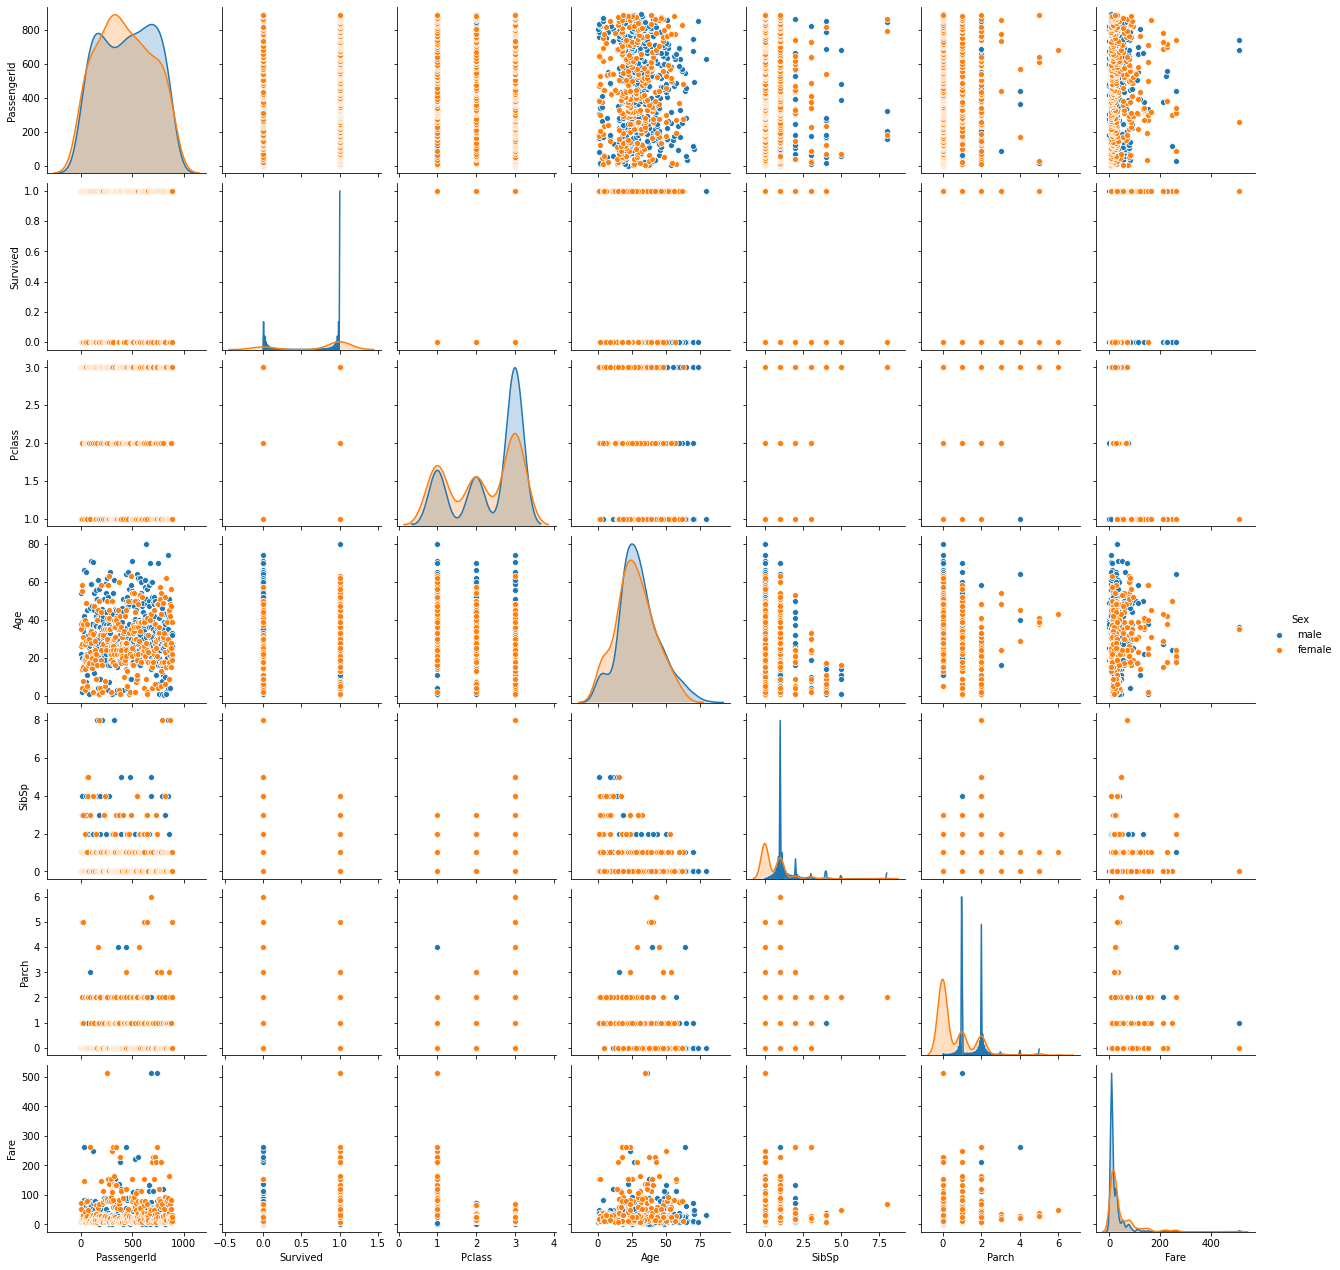

In [ ]:
sns.pairplot(df1,hue='Sex')

In [ ]:
corr=df1.corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


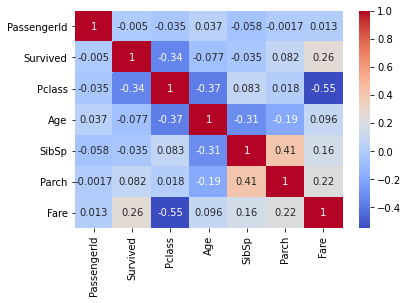

In [ ]:
sns.heatmap(corr,cmap='coolwarm',annot=True)